# Machine Learning LAB 3
# IMAGE CLASSIFICATION WITH NEURAL NETWORKS
Course 2022/23: P. Zanuttigh, F. Barbato, M. Mel

The notebook contains some simple tasks to be performed with **NEURAL NETWORKS (NNs)**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
2. **Re-run all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
3. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
4. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command**.
5. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use [**Fashion MNIST**](https://github.com/zalandoresearch/fashion-mnist), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [18]:
# load the required packages and check Scikit-learn version
%matplotlib inline  

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#from sklearnex import patch_sklearn # if you have an Intel CPU and have installed the Intel MKL 
#patch_sklearn()                     # library you can uncomment these lines for a speedup

scikit-learn version:  1.0.2


In [19]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB3.ipynb**

**Student name**: Dubey Suprio<br>
**ID Number**: 2013036

# A) Hyperparameter Search

**TO DO A.0:** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: `ID = 1234567 + 1`.

In [20]:
ID = 2013036+10
np.random.seed(ID)

Before proceding to the training steps, we **load the dataset**. <br>
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [21]:
# load the MNIST dataset
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data to [0, 1]
X = X / 255.0

Number of samples in the MNIST dataset: 60000


**TO DO A.1:** **Divide** the **data into training and test set** using a **500** samples in the **training set**. <br>
Make sure that **each label** is present at **least 10 times** in training frequencies.

In [22]:
# randomly permute the data and split into training and test taking 
# the first 500 data samples as training and the rests as test
m = X.shape[0]
permutation = np.random.permutation(m) # ADD YOUR CODE HERE

X = X[permutation]
y = y[permutation]

m_training = 500# ADD YOUR CODE HERE

X_train, X_test = X[:m_training],X[m_training:]# ADD YOUR CODE HERE
y_train, y_test = y[:m_training],y[m_training:]# ADD YOUR CODE HERE

labels, freqs = np.unique(y_train, return_counts=True) # ADD YOUR CODE HERE
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [48 53 48 48 50 45 52 43 64 49]


In [23]:
# function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


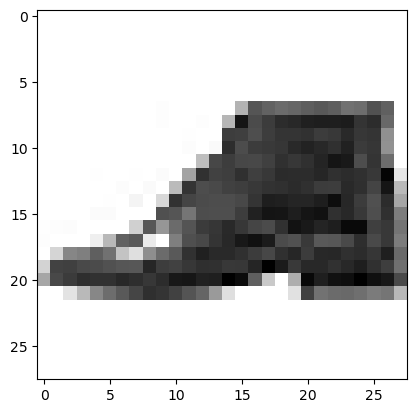

LABEL: 9
INPUT:


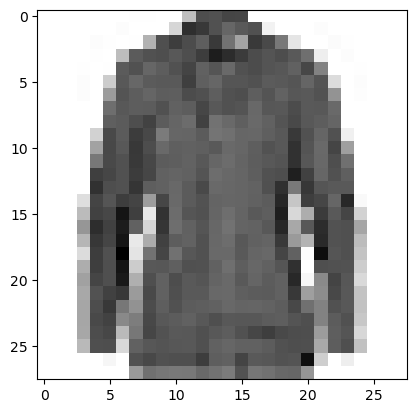

LABEL: 4
INPUT:


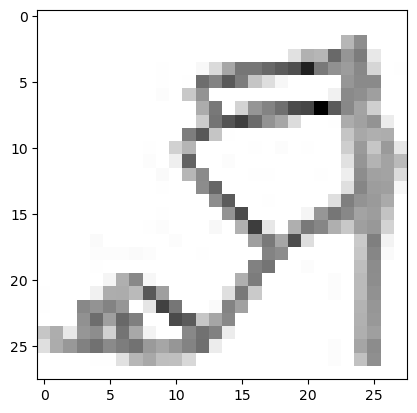

LABEL: 5


In [24]:
# let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

**TO DO A.2** Now **use a feed-forward Neural Network** for prediction. <br><br>
Use the **multi-layer perceptron** classifier, with the following parameters: <br>
`max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID` <br>
The `random_state` parameter ensures the run is the same even if you run it more than once, while the `alpha` parameter is the regularization term.<br>
You might get some **warnings about the convergence**, ignore them (or try to increase the max_iter parameter if you have a powerful computer). <br>

Then, using the default activation function, **pick four or five architectures** to consider, with different numbers of hidden layers and different sizes. <br>
It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. <br>
Evaluate the architectures you chose using **GridSearchCV with cv=5**. <br>

You can reduce the number of iterations if the running time is too long on your computer.

In [25]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (25,), (50,), (25,10,), (50,25,10) ]}


mlp = MLPClassifier(max_iter=10000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)# ADD YOUR CODE HERE

mlp_arch_CV = GridSearchCV(mlp,parameters,cv=5)# ADD YOUR CODE HERE
mlp_arch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

best_parameter_hl = mlp_arch_CV.best_params_

print("Best parameters set found:", best_parameter_hl)
# ADD YOUR CODE HERE
bestparam_score = mlp_arch_CV.best_score_
print("Score with best parameters:",bestparam_score)
# ADD YOUR CODE HERE
score = mlp_arch_CV.cv_results_
all_score = pd.DataFrame.from_dict(score)
printparam = all_score.iloc[0:5,4]
printscore = all_score.iloc[0:5,11]

print("\nMean scores on the grid:",printparam,printscore)

# ADD YOUR CODE HERE
#{'hidden_layer_sizes': (25,)} = 


RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (25,)}
Score with best parameters: 0.776

Mean scores on the grid: 0           (10,)
1           (25,)
2           (50,)
3        (25, 10)
4    (50, 25, 10)
Name: param_hidden_layer_sizes, dtype: object 0    0.684
1    0.776
2    0.774
3    0.596
4    0.404
Name: mean_test_score, dtype: float64


**TO DO A.3** Now **try different batch sizes**, while keeping the **best NN** architecture you have found above. <br>
Remember that the batch size was previously set to the default value, i.e., `min(200, n_samples)`. <br>

Recall that a **batch size of 1 corresponds to baseline SGD**, while using all the **400 training samples** (there are 500 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to **standard GD** and using a different mini-batch size lies in the middle between the two extreme cases.

In [26]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 400]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5) # ADD YOUR CODE HERE, suggestion: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

best_hidden_layer_sizes = best_parameter_hl.get('hidden_layer_sizes')# ADD YOUR CODE HERE

mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes,max_iter=10000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID) # ADD YOUR CODE HERE

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
mlp_batch_CV = GridSearchCV(mlp,parameters,cv=kf)# ADD YOUR CODE HERE
mlp_batch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

best_parameter_batch = mlp_batch_CV.best_params_
print("Best parameters set found:",best_parameter_batch)
# ADD YOUR CODE HERE


bestparam_score = mlp_batch_CV.best_score_
print("Score with best parameters:",bestparam_score)
# ADD YOUR CODE HERE


score = mlp_batch_CV.cv_results_
all_score = pd.DataFrame.from_dict(score)
print("\nAll scores on the grid:",all_score)
# ADD YOUR CODE HERE

RESULTS FOR NN

Best parameters set found: {'batch_size': 400}
Score with best parameters: 0.7699999999999999

All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.176896      1.053676         0.000772        0.000053   
1       0.354892      0.164584         0.000720        0.000035   
2       0.544161      0.048918         0.000783        0.000058   

  param_batch_size               params  split0_test_score  split1_test_score  \
0                1    {'batch_size': 1}               0.08               0.06   
1               32   {'batch_size': 32}               0.71               0.79   
2              400  {'batch_size': 400}               0.77               0.77   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0               0.11               0.11               0.10            0.092   
1               0.60               0.66               0.63            0.678   
2               0.81              

**TO DO A.Q1**

- What do you observe for different architectures and batch sizes? <br>
- How do the number of layers and their sizes affect the performances? <br>
- What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

<div class="alert alert-block alert-info">
**ANSWER A.Q1**:<br>
answer here
    
- The results for different architectures and batch sizes are printed above. We see that for different hidden
    layer number and sizes the score varies, the scores were better for low number of hidden layers. In my case
    the best output was for (25,) with a score 0.7699999999999999 for a default 
    batch size min(200,n_samples).Then for the given best parameter, I tried to train the model for different
    batch size . The best output was for  {batch_size': 400} with a mean test score of 0.77.
 
- It is seen that the less number of layers are giving a better score in comparison to that with higher numbers.
    From the result above it is difficult to  say if there is any realtion within the size of the hidden layer and
    the score as we get the highest score for (25,) then (50,) followed by (10,). So, I think the with less number
    of layers the score improves.

- It is seen that for different batch sizes the performance varies. The mean test score increases on increasing
    the batch size, i.e on increasing the batch size the error decreases also the fit time decreases.
    
</div>

**TO DO A.4** Now **try** to use **different learning rates**, while keeping the **best NN architecture and batch size you have found above.** <br>
**Plot the learning curves** (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. <br>
You might get warnings about the convergence, this is expected. Ignore them.

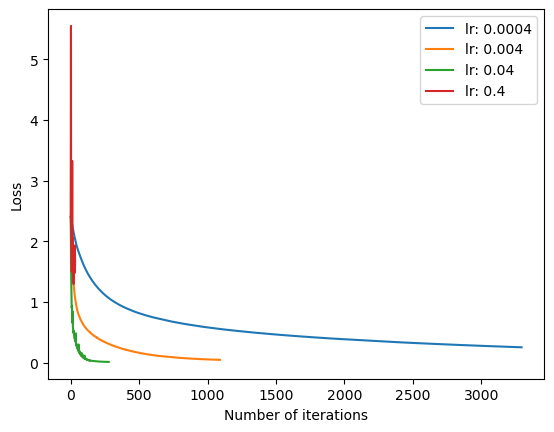

{0.0004: 0.7883697478991597, 0.004: 0.7832941176470588, 0.04: 0.7823529411764706, 0.4: 0.2678655462184874}
RESULTS FOR NN

Best parameters set found: 0.0004
Score with best parameters: 0.7883697478991597


In [27]:
lr_list = [4*10**exp for exp in range(-4,0)]
scores = {}

best_hidden_layer_sizes = best_parameter_hl.get('hidden_layer_sizes')# ADD YOUR CODE HERE
best_batch_size = best_parameter_batch.get('batch_size') # ADD YOUR CODE HERE

for lr in lr_list: 
    mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes,max_iter=10000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=lr, random_state=ID,batch_size=best_batch_size)# ADD YOUR CODE HERE
    mlp.fit(X_train, y_train)
    scores[lr] = mlp.score(X_test,y_test)# ADD YOUR CODE HERE, score on the test set
    plt.plot(mlp.loss_curve_, label='lr: ' + str(lr))

plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()
print(scores)
best_p =max(scores, key=scores.get)
print ('RESULTS FOR NN\n')
print("Best parameters set found:",best_p)
# ADD YOUR CODE HERE
best_s = max(scores.values())
print("Score with best parameters:",best_s)
# ADD YOUR CODE HERE

**Question A.Q2** Comment about the learning curves (i.e. the variation of the loss over the steps). <br>
How does the curve changes for different learning rates in terms of stability and speed of convergence ?

<div class="alert alert-block alert-info">
**ANSWER A.Q2**:<br>
    We see that, when we increase the learning rate it takes less iteration for it to converge, however the score
    is better with a lower learning rate and more itterations.
    </div>

**TO DO A.5** Now get **training and test error** for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case. <br>
As before, you might get a convergence warning, you can safely ignore it.


RESULTS FOR BEST NN

Best NN training error: 0.056000
Best NN test error: 0.211630


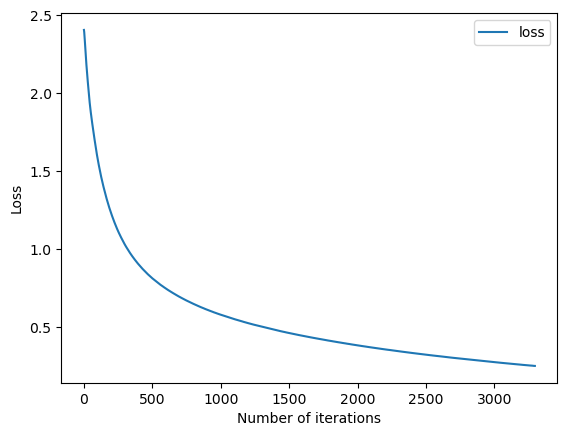

In [28]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes,max_iter=10000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=best_p, random_state=ID,batch_size=best_batch_size)# ADD YOUR CODE HERE
mlp_fit = mlp.fit(X_train, y_train)

training_error = 1 - mlp_fit.score(X_train,y_train)# ADD YOUR CODE HERE
test_error =1 - mlp_fit.score(X_test,y_test) # ADD YOUR CODE HERE

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label="loss")
plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

## B) More data 
Now let's do the same but **using 20000** (or less if it takes too long on your machine) **data points for training**. <br>
Make sure you are **consistent with the choice of `m_training`** in this and the later cells. <br>
Use the **same NN architecture** as before, but you can try more if you like and have a powerful computer!!

In [29]:
X = X[permutation]
y = y[permutation]

m_training = 20000# ADD YOUR CODE HERE

X_train, X_test = X[:m_training],X[m_training:]# ADD YOUR CODE HERE
y_train, y_test = y[:m_training],y[m_training:]# ADD YOUR CODE HERE

labels, freqs = np.unique(y_train, return_counts=True) 
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [1943 2014 2072 1980 1980 1996 1988 1959 2020 2048]


**TO DO B.1** Train the NNs with the added data points using the optimum parameters found above. <br>
Eventually, feel free to try different architectures if you like. <br>
We suggest that you use `verbose=True` so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50). <br>
This is just for debug purposes, **remember to switch it off** once you found a setup you like. <br>
As before, you might get a convergence warning (especially if you reduced the number of iterations), you can safely ignore it.

In [30]:
mlp_large = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes,max_iter=1600, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=best_p, random_state=ID,batch_size=best_batch_size,verbose=True)# ADD YOUR CODE HERE
mlp_fit = mlp_large.fit(X_train, y_train)

print ('\nRESULTS FOR BEST NN\n')

training_error = 1 - mlp_fit.score(X_train,y_train)# ADD YOUR CODE HERE
test_error =1 - mlp_fit.score(X_test,y_test) # ADD YOUR CODE HERE

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

Iteration 1, loss = 2.27798304
Iteration 2, loss = 2.02634352
Iteration 3, loss = 1.84614977
Iteration 4, loss = 1.70619821
Iteration 5, loss = 1.58073905
Iteration 6, loss = 1.47490115
Iteration 7, loss = 1.38546206
Iteration 8, loss = 1.31030715
Iteration 9, loss = 1.24633926
Iteration 10, loss = 1.19159188
Iteration 11, loss = 1.14399098
Iteration 12, loss = 1.10270334
Iteration 13, loss = 1.06655720
Iteration 14, loss = 1.03464826
Iteration 15, loss = 1.00634784
Iteration 16, loss = 0.98082114
Iteration 17, loss = 0.95799514
Iteration 18, loss = 0.93732747
Iteration 19, loss = 0.91844948
Iteration 20, loss = 0.90098005
Iteration 21, loss = 0.88497813
Iteration 22, loss = 0.87026906
Iteration 23, loss = 0.85658816
Iteration 24, loss = 0.84368786
Iteration 25, loss = 0.83186940
Iteration 26, loss = 0.82054202
Iteration 27, loss = 0.81008126
Iteration 28, loss = 0.80008846
Iteration 29, loss = 0.79082342
Iteration 30, loss = 0.78202830
Iteration 31, loss = 0.77356898
Iteration 32, los

Iteration 253, loss = 0.45518874
Iteration 254, loss = 0.45483483
Iteration 255, loss = 0.45424901
Iteration 256, loss = 0.45431650
Iteration 257, loss = 0.45380290
Iteration 258, loss = 0.45348679
Iteration 259, loss = 0.45323868
Iteration 260, loss = 0.45275390
Iteration 261, loss = 0.45256205
Iteration 262, loss = 0.45219147
Iteration 263, loss = 0.45197827
Iteration 264, loss = 0.45168485
Iteration 265, loss = 0.45130658
Iteration 266, loss = 0.45106996
Iteration 267, loss = 0.45069604
Iteration 268, loss = 0.45049335
Iteration 269, loss = 0.45009466
Iteration 270, loss = 0.44980950
Iteration 271, loss = 0.44955796
Iteration 272, loss = 0.44911110
Iteration 273, loss = 0.44890239
Iteration 274, loss = 0.44854819
Iteration 275, loss = 0.44833981
Iteration 276, loss = 0.44805190
Iteration 277, loss = 0.44770415
Iteration 278, loss = 0.44747794
Iteration 279, loss = 0.44704586
Iteration 280, loss = 0.44695481
Iteration 281, loss = 0.44659213
Iteration 282, loss = 0.44618593
Iteration 

Iteration 502, loss = 0.40347844
Iteration 503, loss = 0.40347876
Iteration 504, loss = 0.40324701
Iteration 505, loss = 0.40322038
Iteration 506, loss = 0.40314400
Iteration 507, loss = 0.40291780
Iteration 508, loss = 0.40268068
Iteration 509, loss = 0.40259450
Iteration 510, loss = 0.40247092
Iteration 511, loss = 0.40230537
Iteration 512, loss = 0.40217338
Iteration 513, loss = 0.40228855
Iteration 514, loss = 0.40198644
Iteration 515, loss = 0.40188900
Iteration 516, loss = 0.40168468
Iteration 517, loss = 0.40144833
Iteration 518, loss = 0.40138357
Iteration 519, loss = 0.40149577
Iteration 520, loss = 0.40119250
Iteration 521, loss = 0.40114563
Iteration 522, loss = 0.40088123
Iteration 523, loss = 0.40076748
Iteration 524, loss = 0.40051988
Iteration 525, loss = 0.40032438
Iteration 526, loss = 0.40030157
Iteration 527, loss = 0.40020014
Iteration 528, loss = 0.40002234
Iteration 529, loss = 0.39974325
Iteration 530, loss = 0.39986529
Iteration 531, loss = 0.39959132
Iteration 

Iteration 752, loss = 0.37405625
Iteration 753, loss = 0.37408504
Iteration 754, loss = 0.37403410
Iteration 755, loss = 0.37392237
Iteration 756, loss = 0.37396478
Iteration 757, loss = 0.37367225
Iteration 758, loss = 0.37356097
Iteration 759, loss = 0.37345225
Iteration 760, loss = 0.37347284
Iteration 761, loss = 0.37326353
Iteration 762, loss = 0.37319373
Iteration 763, loss = 0.37320158
Iteration 764, loss = 0.37290409
Iteration 765, loss = 0.37283786
Iteration 766, loss = 0.37277427
Iteration 767, loss = 0.37263556
Iteration 768, loss = 0.37256455
Iteration 769, loss = 0.37284859
Iteration 770, loss = 0.37247965
Iteration 771, loss = 0.37230933
Iteration 772, loss = 0.37221162
Iteration 773, loss = 0.37212125
Iteration 774, loss = 0.37203151
Iteration 775, loss = 0.37182771
Iteration 776, loss = 0.37186418
Iteration 777, loss = 0.37160096
Iteration 778, loss = 0.37168491
Iteration 779, loss = 0.37155473
Iteration 780, loss = 0.37143497
Iteration 781, loss = 0.37138241
Iteration 

Iteration 1002, loss = 0.35223363
Iteration 1003, loss = 0.35228272
Iteration 1004, loss = 0.35224584
Iteration 1005, loss = 0.35216736
Iteration 1006, loss = 0.35193383
Iteration 1007, loss = 0.35179713
Iteration 1008, loss = 0.35186178
Iteration 1009, loss = 0.35159759
Iteration 1010, loss = 0.35161042
Iteration 1011, loss = 0.35155232
Iteration 1012, loss = 0.35137709
Iteration 1013, loss = 0.35141067
Iteration 1014, loss = 0.35132983
Iteration 1015, loss = 0.35132615
Iteration 1016, loss = 0.35115040
Iteration 1017, loss = 0.35118262
Iteration 1018, loss = 0.35102339
Iteration 1019, loss = 0.35097472
Iteration 1020, loss = 0.35098329
Iteration 1021, loss = 0.35088975
Iteration 1022, loss = 0.35068216
Iteration 1023, loss = 0.35082507
Iteration 1024, loss = 0.35044379
Iteration 1025, loss = 0.35102201
Iteration 1026, loss = 0.35029332
Iteration 1027, loss = 0.35036155
Iteration 1028, loss = 0.35022057
Iteration 1029, loss = 0.35018274
Iteration 1030, loss = 0.35018212
Iteration 1031

Iteration 1243, loss = 0.33523810
Iteration 1244, loss = 0.33497032
Iteration 1245, loss = 0.33474881
Iteration 1246, loss = 0.33470118
Iteration 1247, loss = 0.33448452
Iteration 1248, loss = 0.33442833
Iteration 1249, loss = 0.33460654
Iteration 1250, loss = 0.33450204
Iteration 1251, loss = 0.33430783
Iteration 1252, loss = 0.33425671
Iteration 1253, loss = 0.33428485
Iteration 1254, loss = 0.33439078
Iteration 1255, loss = 0.33412973
Iteration 1256, loss = 0.33427243
Iteration 1257, loss = 0.33383953
Iteration 1258, loss = 0.33406965
Iteration 1259, loss = 0.33391466
Iteration 1260, loss = 0.33389152
Iteration 1261, loss = 0.33374779
Iteration 1262, loss = 0.33368954
Iteration 1263, loss = 0.33364859
Iteration 1264, loss = 0.33350678
Iteration 1265, loss = 0.33339365
Iteration 1266, loss = 0.33354299
Iteration 1267, loss = 0.33340207
Iteration 1268, loss = 0.33326959
Iteration 1269, loss = 0.33312891
Iteration 1270, loss = 0.33319248
Iteration 1271, loss = 0.33316579
Iteration 1272

Iteration 1486, loss = 0.31969874
Iteration 1487, loss = 0.31962702
Iteration 1488, loss = 0.31948970
Iteration 1489, loss = 0.31949249
Iteration 1490, loss = 0.31950030
Iteration 1491, loss = 0.31945529
Iteration 1492, loss = 0.31941950
Iteration 1493, loss = 0.31913089
Iteration 1494, loss = 0.31939291
Iteration 1495, loss = 0.31926141
Iteration 1496, loss = 0.31915005
Iteration 1497, loss = 0.31908184
Iteration 1498, loss = 0.31896780
Iteration 1499, loss = 0.31902443
Iteration 1500, loss = 0.31888951
Iteration 1501, loss = 0.31874622
Iteration 1502, loss = 0.31880963
Iteration 1503, loss = 0.31893722
Iteration 1504, loss = 0.31859320
Iteration 1505, loss = 0.31853475
Iteration 1506, loss = 0.31856197
Iteration 1507, loss = 0.31845369
Iteration 1508, loss = 0.31839829
Iteration 1509, loss = 0.31843375
Iteration 1510, loss = 0.31830932
Iteration 1511, loss = 0.31829777
Iteration 1512, loss = 0.31821563
Iteration 1513, loss = 0.31824681
Iteration 1514, loss = 0.31806731
Iteration 1515

**Question B.Q1** Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Comment about the results you obtained.

<div class="alert alert-block alert-info">
**ANSWER B.Q1**:<br>
    
    RESULTS FOR BEST NN for m_training =20_000

    NN training error: 0.107300
    NN test error: 0.137275
    
    RESULTS FOR BEST NN for m_training = 500

    Best NN training error: 0.056000
    Best NN test error: 0.211630.
    We see that in our case the trainig erroe for 500 data points is less than that for 20_000 data
    points.However,we see that the the training of more data points helps in reduced test error on the test
    samples
    
</div>

**TO DO B.2** Plot an example that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=20000 training data points.

INPUT:


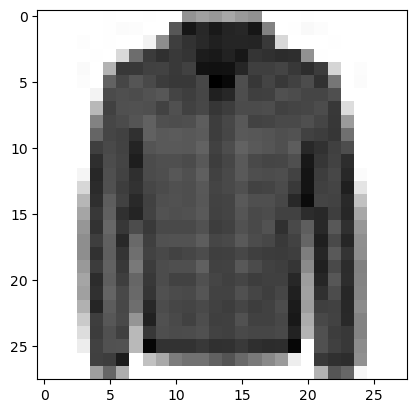

LABEL: 4
NN prediction for m=500: 6
NN prediction for m=20000: 4


In [31]:
NN_prediction = mlp.predict(X_test)# ADD YOUR CODE HERE
large_NN_prediction =mlp_large.predict(X_test) # ADD YOUR CODE HERE

for i, (p, pl, l) in enumerate(zip(NN_prediction, large_NN_prediction, y_test)):
    
    if p != l and pl == l:
        
        plot_input(X_test, y_test, i)
        print("NN prediction for m=500:", p)
        print("NN prediction for m=20000:", pl)
        break

**TO DO B.3** Plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 20000 data points. <br>
Note that the code is provided, you just need to change the `mlp` variable name to the one used before - if you changed it.  

Weights with 500 data points:


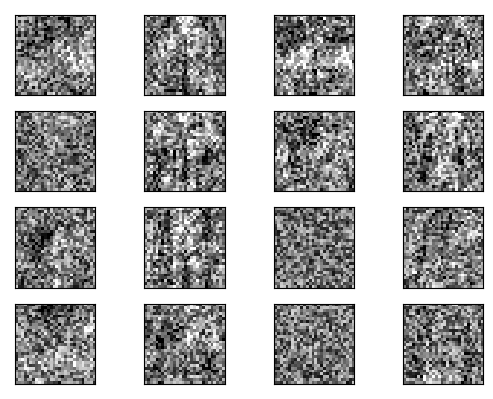

Weights with 20000 data points:


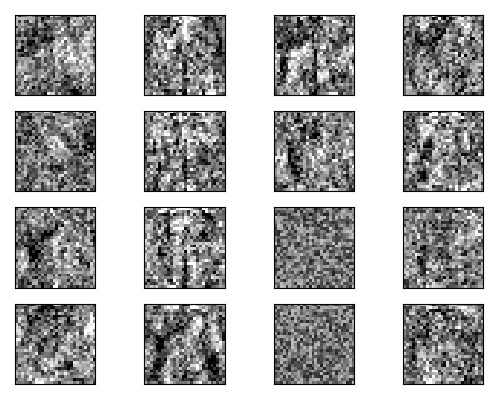

In [32]:
print("Weights with 500 data points:")
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 20000 data points:")
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

**Question B.Q2** Describe what do you observe by looking at the weights

<div class="alert alert-block alert-info">
**ANSWER B.Q2**:<br>
    Just by looking at the weights , I couldnt really differentiate between the 500 data points and 20000
    data points. Although the weights with 20000 data points are somewhat more clear than that of 500 but it is
    difficult to clearly distinguish between the labels by looking at the outputs.
    </div>

**TO DO B.4** Create a SVM classifier with the following parameters: `kernel='rbf', C=10, gamma=0.01`. <br>
Fit it on a few data points and compute its training and test scores.

In [33]:
m_training = 20000 # ADD YOUR CODE HERE


X_train, X_test = X[:m_training],X[m_training:]# ADD YOUR CODE HERE
y_train, y_test = y[:m_training],y[m_training:]# ADD YOUR CODE HERE


# best parameters found in the SVM notebook
SVM = SVC(kernel='rbf',C=10.,gamma=0.01)# ADD YOUR CODE HERE
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')
SVM_training_error = 1- SVM.score(X_train,y_train)# ADD YOUR CODE HERE

print("Training score SVM:",SVM.score(X_train,y_train))
print(SVM_training_error)

SVM_test_error = 1- SVM.score(X_test,y_test)# ADD YOUR CODE HERE
print("Test score SVM:",SVM.score(X_test,y_test))
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM: 0.9767
0.023299999999999987
Test score SVM: 0.888625
0.111375


**Question B.Q3** Compare the results of SVM and of NN. Which one achieves the best performances? 

<div class="alert alert-block alert-info">
**ANSWER B.Q3**:<br>
    RESULTS FOR SVM
    Training error SVM: 0.023299999999999987
    Test error SVM: 0.111375<br>
    RESULTS FOR BEST NN for m_training =20_000

    NN training error: 0.107300
    NN test error: 0.137275
    On comparing SVM with NN we see that the SVM gives a better performance on the training data with less 
    error,which is the same on the test set i.e the svm has a better performance.
</div>

In [34]:
print("done")

done
